In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes= pd.read_csv("diabetes.csv")
print (diabetes.shape)
print ("--"*30)
print (diabetes.info())

(768, 9)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
# class distribution
print(" Outcome distribution")
print(diabetes.groupby('Outcome').size())
ratio = diabetes['Outcome'].sum()/(diabetes['Outcome'].sum() + (1-diabetes['Outcome']).sum())
print(ratio)
1-ratio

 Outcome distribution
Outcome
0    500
1    268
dtype: int64
0.3489583333333333


0.6510416666666667

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
# We replace the NaN values with the mean or median.
# Glucose and BloodPressure dont have much outliers, and we need little data to fill. The mean will be enough.
# The others, has a huge disparity between some samples, and we need a lot of data. So the median is best.
diabetes["Glucose"].fillna(diabetes["Glucose"].mean(),inplace=True)
diabetes["BloodPressure"].fillna(diabetes["BloodPressure"].mean(),inplace=True)
diabetes["SkinThickness"].fillna(diabetes["SkinThickness"].median(),inplace=True)
diabetes["Insulin"].fillna(diabetes["Insulin"].median(),inplace=True)
diabetes["BMI"].fillna(diabetes["BMI"].median(),inplace=True)

print (diabetes.isnull().sum())
print ('--'*40)
diabetes.info()
print ('--'*40)
diabetes.head()
diabetes.describe()

#1) Replace 0 values to NaN values. Then sum the null values in each of those features,
#to know how many null values we have.
diabetes_copy=diabetes.copy(deep=True) ## We will need later the diabetes dataset with the 0s.

diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
print (diabetes.isnull().sum())
diabetes.describe()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
------------------------------------------------------

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


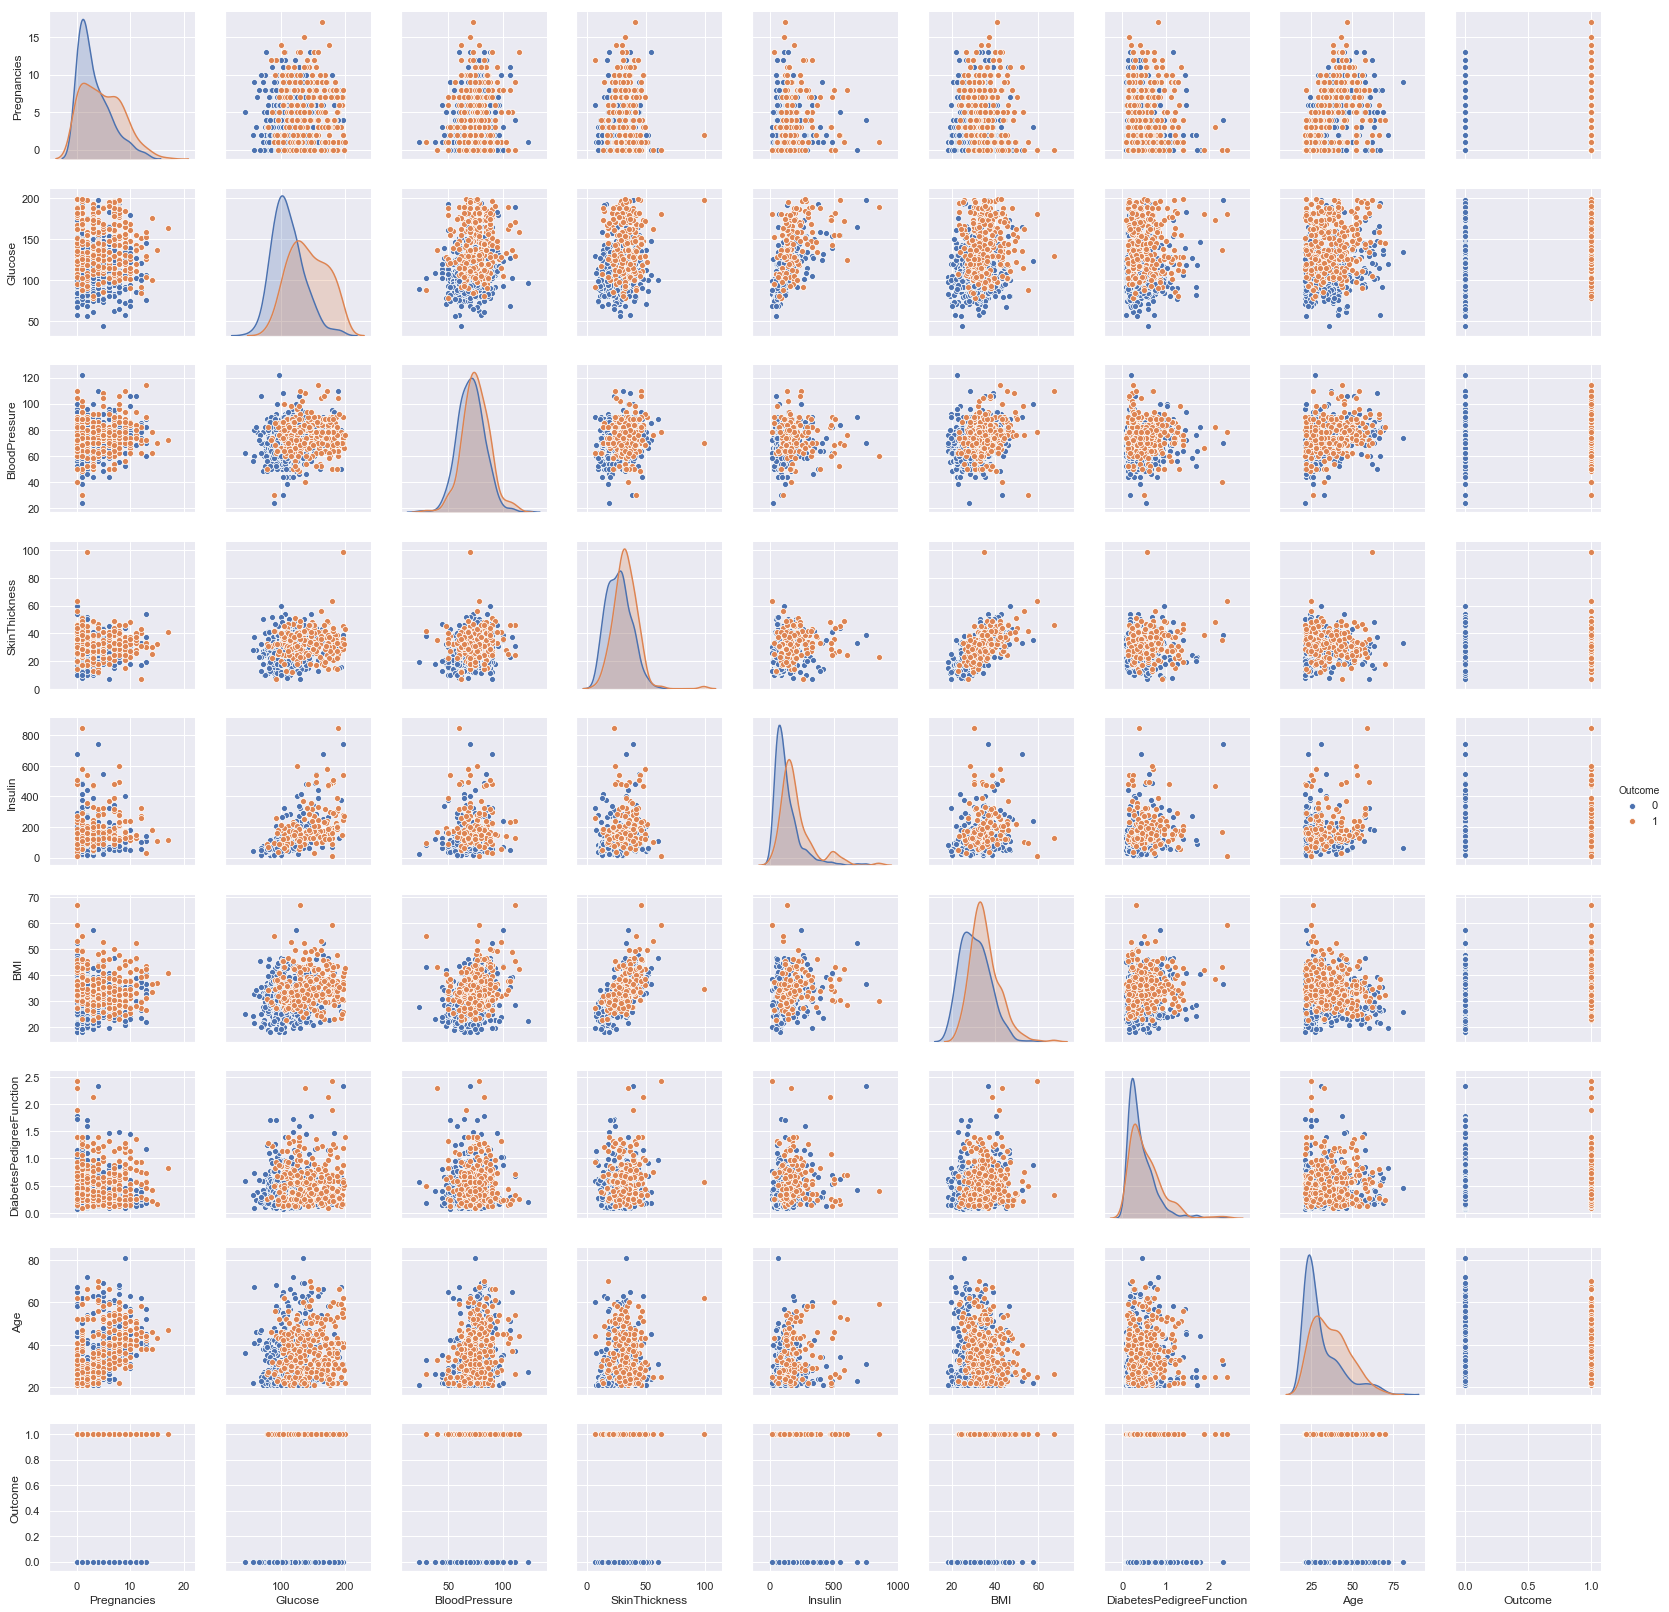

In [6]:
# pair plot for clean data
p=sns.pairplot(diabetes, hue = 'Outcome')

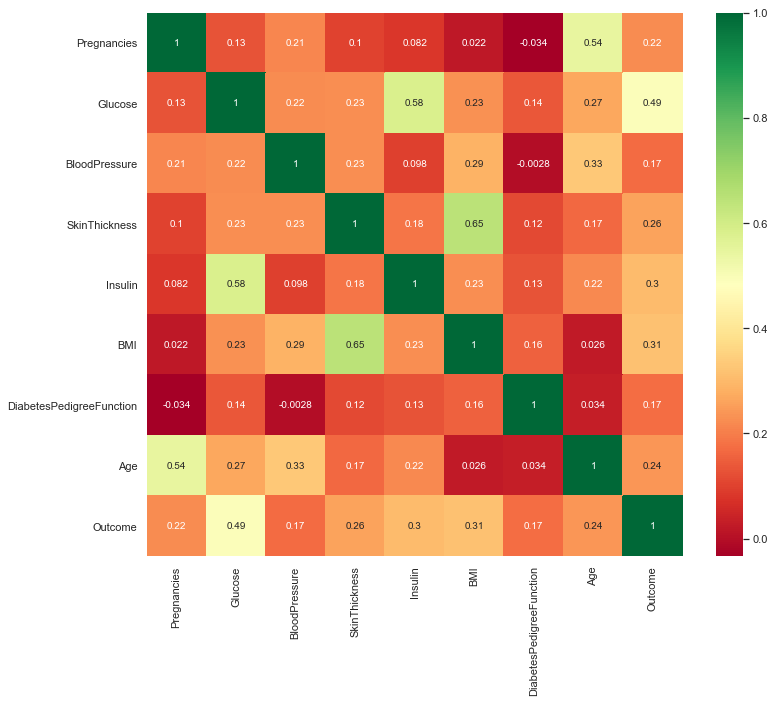

In [7]:
# heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [8]:
# import baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import (GridSearchCV,StratifiedKFold)

/Users/HuongGiangTran/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/HuongGiangTran/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ModuleNotFoundError: No module named 'imblearn'

In [9]:
# scale and split
from sklearn.preprocessing import StandardScaler
X=diabetes_copy.drop(["Outcome"], axis=1)
y=diabetes_copy["Outcome"]
print (X.info())
columnas=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X=pd.DataFrame(X_scaled, columns=[columnas])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=444, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None


LR : AUROC = 0.821, AUPRC = 0.702,  . 
Accuracy = 0.783, log loss = 7.479,
------------------------------------------------------------
LDA : AUROC = 0.822, AUPRC = 0.702,  . 
Accuracy = 0.780, log loss = 7.615,
------------------------------------------------------------
KNN : AUROC = 0.752, AUPRC = 0.605,  . 
Accuracy = 0.736, log loss = 9.111,
------------------------------------------------------------
NB : AUROC = 0.809, AUPRC = 0.659,  . 
Accuracy = 0.783, log loss = 7.479,
------------------------------------------------------------
RF : AUROC = 0.759, AUPRC = 0.634,  . 
Accuracy = 0.728, log loss = 9.383,
------------------------------------------------------------
DecisionTree : AUROC = 0.652, AUPRC = 0.626,  . 
Accuracy = 0.689, log loss = 10.742,
------------------------------------------------------------
SVM : AUROC = 0.814, AUPRC = 0.699,  . 
Accuracy = 0.764, log loss = 8.159,
------------------------------------------------------------


NameError: name 'title_name' is not defined

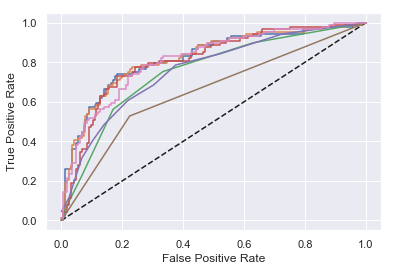

In [10]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, accuracy_score
seed=7
models = [] # Here I will append all the algorithms that I will use. Each one will run in all the created datasets.
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=42)))
models.append(('SVM',SVC(random_state=42,probability=True)))

test_ratio = y_test.sum()/len(y_test)
# compare different classifiers
results_accuracy=[]
results_auroc=[]
results_average_precision=[]
results_neg_log_loss=[]
results_f1 = []
results_recall =[]
names=[]
fpr_full = []
tpr_full = []
thresholds_roc_full = []
precision_full = []
recall_full = []
thresholds_prc_full = []
measures = ['AUROC','AUPRC','accuracy','log loss','F1']
scores_table = np.zeros([8,5])
roc_cut = np.zeros([8,]).astype(int) # cut points for fpr, tpr, thresholds for ROC curve of each model
prc_cut = np.zeros([8,]).astype(int) # cut points for precision, recall, thresholds for PRC curve of each model
i = 0 # looping index
for name, model in models:
        y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        fpr_full = np.concatenate((fpr_full, fpr))
        tpr_full = np.concatenate((tpr_full, tpr))
        thresholds_roc_full = np.concatenate((thresholds_roc_full, thresholds))
        roc_cut[i + 1] = roc_cut[i] + fpr.shape[0]
        #Area under ROC curve
        auroc = roc_auc_score(y_test,y_pred_proba)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
        precision_full = np.concatenate((precision_full, precision))
        recall_full = np.concatenate((recall_full, recall))
        thresholds_prc_full = np.concatenate((thresholds_prc_full, thresholds))
        prc_cut[i + 1] = prc_cut[i] + recall.shape[0]
        # area under PRC curve
        auprc = auc(recall, precision)

        accuracy = accuracy_score(y_test, model.predict(X_test))
        average_precision = average_precision_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test))
        log_loss_score = log_loss(y_test, model.predict(X_test))
        recall = recall_score(y_test, model.predict(X_test))
        names.append(name)


        # report of scores
        scores_table[i, 0] = auroc
        scores_table[i, 1] = auprc
        scores_table[i, 2] = accuracy
        scores_table[i, 3] = log_loss_score
        scores_table[i, 4] = f1

        print(name,': AUROC = {:.3f}, AUPRC = {:.3f}, '.format(auroc,auprc),
              '. \nAccuracy = {:.3f}, log loss = {:.3f},'.format(accuracy, log_loss_score))
        print ("--"*30)
        i = i + 1

scores_table[5, 0] = 0.5 # random guess
scores_table[5, 1] = test_ratio # random guess   
#plot ROC
plt.plot([0,1],[0,1],'k--')
for i in range(7):
    plt.plot(fpr_full[roc_cut[i]:roc_cut[i + 1]],tpr_full[roc_cut[i]:roc_cut[i + 1]], label=name)
plt.xlabel('fpr')
plt.ylabel('tpr')
title_name = 'ROC curve for diabetes'
plt.title(title_name)
plt.legend(['random guess','Logistic Regression', 'LDA','KNN','Naive Bayes','Random Forest','Decision Tree','SVM'])
save_name = 'diabetes_ROC_curve.png'
plt.savefig(save_name)
plt.show()

# plot PRC
plt.axhline(y=test_ratio, xmin=0, xmax=1,color='k', linestyle = '--')
for i in range(7):
    plt.plot(recall_full[prc_cut[i]:prc_cut[i + 1]],precision_full[prc_cut[i]:prc_cut[i + 1]], label=name)
plt.xlabel('recall')
plt.ylabel('precision')
title_name = 'Precision-Recall curve for diabetes'
plt.title(title_name)
plt.legend(['random guess','Logistic Regression', 'LDA','KNN','Naive Bayes','Random Forest','Decision Tree','SVM'])
save_name = 'diabetes_PRcurve.png'
plt.savefig(save_name)
plt.show()

for i in range(5):
    print('The best model measured by ',measures[i],'is ',names[np.argmax(scores_table[:5,i])]) 
print ("--"*30)
print ("--"*30)
csv_name ='diabetes_scores.csv'
np.savetxt(csv_name, scores_table, delimiter=",")
    